In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy  
import scikits.bootstrap as bootstrap
import statsmodels.stats.api as sms
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import pandas as pd
from ggplot import *
from scipy import stats
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle


%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

c:\python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\python27\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in 

In [2]:
data_bend1_test1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending1/test_data/dataset1.csv',skiprows=4,error_bad_lines=False)
data_bend1_test2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending1/test_data/dataset2.csv',skiprows=4,error_bad_lines=False)

data_bend2_test1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending2/test_data/dataset1.csv',skiprows=4,error_bad_lines=False)
data_bend2_test2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending2/test_data/dataset2.csv',skiprows=4,error_bad_lines=False)

data_cycling_test1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/test_data/dataset1.csv',skiprows=4,error_bad_lines=False)
data_cycling_test2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/test_data/dataset2.csv',skiprows=4,error_bad_lines=False)
data_cycling_test3 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/test_data/dataset3.csv',skiprows=4,error_bad_lines=False)

data_lying_test1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/test_data/dataset1.csv',skiprows=4,error_bad_lines=False)
data_lying_test2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/test_data/dataset2.csv',skiprows=4,error_bad_lines=False)
data_lying_test3 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/test_data/dataset3.csv',skiprows=4,error_bad_lines=False)

data_sitting_test1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/test_data/dataset1.csv',skiprows=4,error_bad_lines=False)
data_sitting_test2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/test_data/dataset2.csv',skiprows=4,error_bad_lines=False)
data_sitting_test3 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/test_data/dataset3.csv',skiprows=4,error_bad_lines=False)

data_standing_test1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/test_data/dataset1.csv',skiprows=4,error_bad_lines=False)
data_standing_test2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/test_data/dataset2.csv',skiprows=4,error_bad_lines=False)
data_standing_test3 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/test_data/dataset3.csv',skiprows=4,error_bad_lines=False)

data_walking_test1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/test_data/dataset1.csv',skiprows=4,error_bad_lines=False)
data_walking_test2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/test_data/dataset2.csv',skiprows=4,error_bad_lines=False)
data_walking_test3 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/test_data/dataset3.csv',skiprows=4,error_bad_lines=False)


In [3]:
data_bend1_train1 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending1/train_data/dataset3.csv',skiprows=4,error_bad_lines=False)
data_bend1_train2 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending1/train_data/dataset4.csv',skiprows=4,error_bad_lines=False)
data_bend1_train3 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending1/train_data/dataset5.csv',skiprows=4,error_bad_lines=False)
data_bend1_train4 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending1/train_data/dataset6.csv',skiprows=4,error_bad_lines=False)
data_bend1_train5 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending1/train_data/dataset7.csv',skiprows=4,error_bad_lines=False)


data_bend2_train6 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending2/train_data/dataset3.csv',skiprows=4,error_bad_lines=False)
data_bend2_train7 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending2/train_data/dataset4.csv',skiprows=4,error_bad_lines=False)
data_bend2_train8 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending2/train_data/dataset5.csv',skiprows=4,error_bad_lines=False)
data_bend2_train9 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/bending2/train_data/dataset6.csv',skiprows=4,error_bad_lines=False)



In [4]:
data_cycling_train10 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset4.csv',skiprows=4,error_bad_lines=False)
data_cycling_train11 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset5.csv',skiprows=4,error_bad_lines=False)
data_cycling_train12 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset6.csv',skiprows=4,error_bad_lines=False)
data_cycling_train15 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset9.csv',skiprows=4,error_bad_lines=False)

data_cycling_train13 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset7.csv',skiprows=4,error_bad_lines=False)
data_cycling_train14 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset8.csv',skiprows=4,error_bad_lines=False)

data_cycling_train16 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset10.csv',skiprows=4,error_bad_lines=False)
data_cycling_train17 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset11.csv',skiprows=4,error_bad_lines=False)
data_cycling_train18 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset12.csv',skiprows=4,error_bad_lines=False)
data_cycling_train19 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset13.csv',skiprows=4,error_bad_lines=False)
data_cycling_train20 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset14.csv',skiprows=4,error_bad_lines=False)
data_cycling_train21 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/cycling/train_data/dataset15.csv',skiprows=4,error_bad_lines=False)

Skipping line 485: expected 7 fields, saw 8

Skipping line 485: expected 7 fields, saw 8



In [5]:
data_lying_train22 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset4.csv',skiprows=4,error_bad_lines=False)
data_lying_train23 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset5.csv',skiprows=4,error_bad_lines=False)
data_lying_train24 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset6.csv',skiprows=4,error_bad_lines=False)
data_lying_train25 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset7.csv',skiprows=4,error_bad_lines=False)
data_lying_train26 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset8.csv',skiprows=4,error_bad_lines=False)
data_lying_train27 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset9.csv',skiprows=4,error_bad_lines=False)
data_lying_train28 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset10.csv',skiprows=4,error_bad_lines=False)
data_lying_train29 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset11.csv',skiprows=4,error_bad_lines=False)
data_lying_train30 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset12.csv',skiprows=4,error_bad_lines=False)
data_lying_train31 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset13.csv',skiprows=4,error_bad_lines=False)
data_lying_train32 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset14.csv',skiprows=4,error_bad_lines=False)
data_lying_train33 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/lying/train_data/dataset15.csv',skiprows=4,error_bad_lines=False)


data_sitting_train34 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset4.csv',skiprows=4,error_bad_lines=False)
data_sitting_train35 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset5.csv',skiprows=4,error_bad_lines=False)
data_sitting_train36 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset6.csv',skiprows=4,error_bad_lines=False)
data_sitting_train37 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset7.csv',skiprows=4,error_bad_lines=False)
data_sitting_train38 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset8.csv',skiprows=4,error_bad_lines=False)
data_sitting_train39 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset9.csv',skiprows=4,error_bad_lines=False)
data_sitting_train40 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset10.csv',skiprows=4,error_bad_lines=False)
data_sitting_train41 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset11.csv',skiprows=4,error_bad_lines=False)
data_sitting_train42 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset12.csv',skiprows=4,error_bad_lines=False)
data_sitting_train43 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset13.csv',skiprows=4,error_bad_lines=False)
data_sitting_train44 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset14.csv',skiprows=4,error_bad_lines=False)
data_sitting_train45 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/sitting/train_data/dataset15.csv',skiprows=4,error_bad_lines=False)

data_standing_train46 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset4.csv',skiprows=4,error_bad_lines=False)
data_standing_train47 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset5.csv',skiprows=4,error_bad_lines=False)
data_standing_train48 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset6.csv',skiprows=4,error_bad_lines=False)
data_standing_train49 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset7.csv',skiprows=4,error_bad_lines=False)
data_standing_train50 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset8.csv',skiprows=4,error_bad_lines=False)
data_standing_train51 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset9.csv',skiprows=4,error_bad_lines=False)
data_standing_train52 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset10.csv',skiprows=4,error_bad_lines=False)
data_standing_train53 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset11.csv',skiprows=4,error_bad_lines=False)
data_standing_train54 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset12.csv',skiprows=4,error_bad_lines=False)
data_standing_train55 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset13.csv',skiprows=4,error_bad_lines=False)
data_standing_train56 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset14.csv',skiprows=4,error_bad_lines=False)
data_standing_train57 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/standing/train_data/dataset15.csv',skiprows=4,error_bad_lines=False)

data_walking_train58 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset4.csv',skiprows=4,error_bad_lines=False)
data_walking_train59 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset5.csv',skiprows=4,error_bad_lines=False)
data_walking_train60 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset6.csv',skiprows=4,error_bad_lines=False)
data_walking_train61 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset7.csv',skiprows=4,error_bad_lines=False)
data_walking_train62 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset8.csv',skiprows=4,error_bad_lines=False)
data_walking_train63 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset9.csv',skiprows=4,error_bad_lines=False)
data_walking_train64 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset10.csv',skiprows=4,error_bad_lines=False)
data_walking_train65 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset11.csv',skiprows=4,error_bad_lines=False)
data_walking_train66 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset12.csv',skiprows=4,error_bad_lines=False)
data_walking_train67 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset13.csv',skiprows=4,error_bad_lines=False)
data_walking_train68 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset14.csv',skiprows=4,error_bad_lines=False)
data_walking_train69 = pd.read_csv('G:/MASTERS-Prashanth/1ST SEM/ML/homework_2/AReM/walking/train_data/dataset15.csv',skiprows=4,error_bad_lines=False)


In [6]:
d_min_1 = data_bend1_test1.min()
d_min_2 = data_bend1_test2.min()
d_min_3 = data_bend2_test1.min()
d_min_4 = data_bend2_test2.min()
d_min_5 = data_cycling_test1.min()
d_min_6 = data_cycling_test2.min()
d_min_7 = data_cycling_test3.min()
d_min_8 = data_lying_test1.min()
d_min_9 = data_lying_test2.min()
d_min_10 = data_lying_test3.min()
d_min_11 = data_sitting_test1.min()
d_min_12 = data_sitting_test2.min()
d_min_13 = data_sitting_test3.min()
d_min_14 = data_standing_test1.min()
d_min_15 = data_standing_test2.min()
d_min_16 = data_standing_test3.min()
d_min_17 = data_walking_test1.min()
d_min_18 = data_walking_test2.min()
d_min_19 = data_walking_test3.min()
print d_min_1
print len(d_min_1)
print d_min_1[1]


# Columns: time     0.00
avg_rss12          37.25
var_rss12           0.00
avg_rss13           4.00
var_rss13           0.00
avg_rss23          27.25
var_rss23           0.00
dtype: float64
7
37.25


In [7]:
d_max_1 = data_bend1_test1.max()
d_max_2 = data_bend1_test2.max()
d_max_3 = data_bend2_test1.max()
d_max_4 = data_bend2_test2.max()
d_max_5 = data_cycling_test1.max()
d_max_6 = data_cycling_test2.max()
d_max_7 = data_cycling_test3.max()
d_max_8 = data_lying_test1.max()
d_max_9 = data_lying_test2.max()
d_max_10 = data_lying_test3.max()
d_max_11 = data_sitting_test1.max()
d_max_12 = data_sitting_test2.max()
d_max_13 = data_sitting_test3.max()
d_max_14 = data_standing_test1.max()
d_max_15 = data_standing_test2.max()
d_max_16 = data_standing_test3.max()
d_max_17 = data_walking_test1.max()
d_max_18 = data_walking_test2.max()
d_max_19 = data_walking_test3.max()
print d_max_1

# Columns: time    119750.00
avg_rss12              45.00
var_rss12               1.30
avg_rss13              29.50
var_rss13               7.23
avg_rss23              38.25
var_rss23               1.92
dtype: float64


In [8]:
d_mean_1 = data_bend1_test1.mean()
d_mean_2 = data_bend1_test2.mean()
d_mean_3 = data_bend2_test1.mean()
d_mean_4 = data_bend2_test2.mean()
d_mean_5 = data_cycling_test1.mean()
d_mean_6 = data_cycling_test2.mean()
d_mean_7 = data_cycling_test3.mean()
d_mean_8 = data_lying_test1.mean()
d_mean_9 = data_lying_test2.mean()
d_mean_10 = data_lying_test3.mean()
d_mean_11 = data_sitting_test1.mean()
d_mean_12 = data_sitting_test2.mean()
d_mean_13 = data_sitting_test3.mean()
d_mean_14 = data_standing_test1.mean()
d_mean_15 = data_standing_test2.mean()
d_mean_16 = data_standing_test3.mean()
d_mean_17 = data_walking_test1.mean()
d_mean_18 = data_walking_test2.mean()
d_mean_19 = data_walking_test3.mean()
print type(d_mean_19)
print d_mean_1

  


<class 'pandas.core.series.Series'>
# Columns: time    59875.000000
avg_rss12             40.624792
var_rss12              0.358604
avg_rss13             19.040937
var_rss13              0.832542
avg_rss23             34.311292
var_rss23              0.570583
dtype: float64


In [9]:
rows =[]
total_columns =['min_avg_rss12','min_var_rss12','min_avg_rss13','min_var_rss13','min_avg_rss23','min_var_rss23','max_avg_rss12','max_var_rss12','max_avg_rss13','max_var_rss13','max_avg_rss23','max_var_rss23','mean_avg_rss12','mean_var_rss12','mean_avg_rss13','mean_var_rss13','mean_avg_rss23','mean_var_rss23']


In [10]:

for i in range(1,7):
    r=d_min_1[i]
    print r
    rows.append(r)
#print rows
print len(rows)   


37.25
0.0
4.0
0.0
27.25
0.0
6


In [11]:
for i in range(1,7):
    r=d_max_1[i]
    print r
    rows.append(r)   
print rows


45.0
1.3
29.5
7.23
38.25
1.92
[37.25, 0.0, 4.0, 0.0, 27.25, 0.0, 45.0, 1.3, 29.5, 7.23, 38.25, 1.92]


In [12]:
for i in range(1,7):
    r=d_mean_1[i]
    print r
    rows.append(r) 

print rows

40.62479166666665
0.35860416666666745
19.0409375
0.8325416666666676
34.31129166666666
0.5705833333333344
[37.25, 0.0, 4.0, 0.0, 27.25, 0.0, 45.0, 1.3, 29.5, 7.23, 38.25, 1.92, 40.62479166666665, 0.35860416666666745, 19.0409375, 0.8325416666666676, 34.31129166666666, 0.5705833333333344]


In [13]:
dataframe_test = pd.DataFrame(columns=total_columns)
#print (dataframe_test)
dataframe_test.shape


(0, 18)

In [14]:
dataframe_test.loc[0] = rows
display(dataframe_test) 

,min_avg_rss12,min_var_rss12,min_avg_rss13,min_var_rss13,min_avg_rss23,min_var_rss23,max_avg_rss12,max_var_rss12,max_avg_rss13,max_var_rss13,max_avg_rss23,max_var_rss23,mean_avg_rss12,mean_var_rss12,mean_avg_rss13,mean_var_rss13,mean_avg_rss23,mean_var_rss23
0,37.25,0.0,4.0,0.0,27.25,0.0,45.0,1.3,29.5,7.23,38.25,1.92,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583


In [15]:

array1 = [[(eval('d_min_'+str(x)))[1:],eval('d_max_'+str(x))[1:],eval('d_mean_'+str(x))[1:]] for x in range(1,20)]
#print array1[0]
#print eval('d_min_'+str(1))
#print array1[0]
print len(array1[0])

#print type(array1)


3


In [16]:

array1 = [[(eval('d_min_'+str(x)))[1:],eval('d_max_'+str(x))[1:],eval('d_mean_'+str(x))[1:]] for x in range(1,20)]
#print array1[0]
#print eval('d_min_'+str(1))
#print array1[0]
print len(array1[0])
print type(array1[0])
#print type(array1)


3
<type 'list'>


In [17]:
dataframe_test = pd.DataFrame(columns=total_columns)
print (dataframe_test)
dataframe_test.shape

Empty DataFrame
Columns: [min_avg_rss12, min_var_rss12, min_avg_rss13, min_var_rss13, min_avg_rss23, min_var_rss23, max_avg_rss12, max_var_rss12, max_avg_rss13, max_var_rss13, max_avg_rss23, max_var_rss23, mean_avg_rss12, mean_var_rss12, mean_avg_rss13, mean_var_rss13, mean_avg_rss23, mean_var_rss23]
Index: []


(0, 18)

In [18]:
import itertools
from IPython.display import display, HTML
for i in range(0,19):
    #print i
    dataframe_test.loc[i] = list(itertools.chain.from_iterable(array1[i]))
#display(dataframe_test) 
#dataframe_test.head()
dataframe_test.shape

(19, 18)

In [19]:
d_min_train_1 = data_bend1_train1.min()
d_min_train_2 = data_bend1_train2.min()
d_min_train_3 = data_bend1_train3.min()
d_min_train_4 = data_bend1_train4.min()
d_min_train_5 = data_bend1_train5.min()

d_min_train_6 = data_bend2_train6.min()
d_min_train_7 = data_bend2_train7.min()
d_min_train_8 = data_bend2_train8.min()
d_min_train_9 = data_bend2_train9.min()

d_min_train_10 = data_cycling_train10.min()
d_min_train_11 = data_cycling_train11.min()
d_min_train_12 = data_cycling_train12.min()
d_min_train_13 = data_cycling_train13.min()
d_min_train_14 = data_cycling_train14.min()
d_min_train_15 = data_cycling_train15.min()
d_min_train_16 = data_cycling_train16.min()
d_min_train_17 = data_cycling_train17.min()
d_min_train_18 = data_cycling_train18.min()
d_min_train_19 = data_cycling_train19.min()
d_min_train_20 = data_cycling_train20.min()
d_min_train_21 = data_cycling_train21.min()


d_min_train_22 = data_lying_train22.min()
d_min_train_23 = data_lying_train23.min()
d_min_train_24 = data_lying_train24.min()
d_min_train_25 = data_lying_train25.min()
d_min_train_26 = data_lying_train26.min()
d_min_train_27 = data_lying_train27.min()
d_min_train_28 = data_lying_train28.min()
d_min_train_29 = data_lying_train29.min()
d_min_train_30 = data_lying_train30.min()
d_min_train_31 = data_lying_train31.min()
d_min_train_32 = data_lying_train32.min()
d_min_train_33 = data_lying_train33.min()


d_min_train_34 = data_sitting_train34.min()
d_min_train_35 = data_sitting_train35.min()
d_min_train_36 = data_sitting_train36.min()
d_min_train_37 = data_sitting_train37.min()
d_min_train_38 = data_sitting_train38.min()
d_min_train_39 = data_sitting_train39.min()
d_min_train_40 = data_sitting_train40.min()
d_min_train_41 = data_sitting_train41.min()
d_min_train_42 = data_sitting_train42.min()
d_min_train_43 = data_sitting_train43.min()
d_min_train_44 = data_sitting_train44.min()
d_min_train_45 = data_sitting_train45.min()

d_min_train_46 = data_standing_train46.min()
d_min_train_47 = data_standing_train47.min()
d_min_train_48 = data_standing_train48.min()
d_min_train_49 = data_standing_train49.min()
d_min_train_50 = data_standing_train50.min()
d_min_train_51 = data_standing_train51.min()
d_min_train_52 = data_standing_train52.min()
d_min_train_53 = data_standing_train53.min()
d_min_train_54 = data_standing_train54.min()
d_min_train_55 = data_standing_train55.min()
d_min_train_56 = data_standing_train56.min()
d_min_train_57 = data_standing_train57.min()

d_min_train_58 = data_walking_train58.min()
d_min_train_59 = data_walking_train59.min()
d_min_train_60 = data_walking_train60.min()
d_min_train_61 = data_walking_train61.min()
d_min_train_62 = data_walking_train62.min()
d_min_train_63 = data_walking_train63.min()
d_min_train_64 = data_walking_train64.min()
d_min_train_65 = data_walking_train65.min()
d_min_train_66 = data_walking_train66.min()
d_min_train_67 = data_walking_train67.min()
d_min_train_68 = data_walking_train68.min()
d_min_train_69 = data_walking_train69.min()


In [20]:
d_max_train_1 = data_bend1_train1.max()
d_max_train_2 = data_bend1_train2.max()
d_max_train_3 = data_bend1_train3.max()
d_max_train_4 = data_bend1_train4.max()
d_max_train_5 = data_bend1_train5.max()

d_max_train_6 = data_bend2_train6.max()
d_max_train_7 = data_bend2_train7.max()
d_max_train_8 = data_bend2_train8.max()
d_max_train_9 = data_bend2_train9.max()

d_max_train_10 = data_cycling_train10.max()
d_max_train_11 = data_cycling_train11.max()
d_max_train_12 = data_cycling_train12.max()
d_max_train_13 = data_cycling_train13.max()
d_max_train_14 = data_cycling_train14.max()
d_max_train_15 = data_cycling_train15.max()
d_max_train_16 = data_cycling_train16.max()
d_max_train_17 = data_cycling_train17.max()
d_max_train_18 = data_cycling_train18.max()
d_max_train_19 = data_cycling_train19.max()
d_max_train_20 = data_cycling_train20.max()
d_max_train_21 = data_cycling_train21.max()


d_max_train_22 = data_lying_train22.max()
d_max_train_23 = data_lying_train23.max()
d_max_train_24 = data_lying_train24.max()
d_max_train_25 = data_lying_train25.max()
d_max_train_26 = data_lying_train26.max()
d_max_train_27 = data_lying_train27.max()
d_max_train_28 = data_lying_train28.max()
d_max_train_29 = data_lying_train29.max()
d_max_train_30 = data_lying_train30.max()
d_max_train_31 = data_lying_train31.max()
d_max_train_32 = data_lying_train32.max()
d_max_train_33 = data_lying_train33.max()


d_max_train_34 = data_sitting_train34.max()
d_max_train_35 = data_sitting_train35.max()
d_max_train_36 = data_sitting_train36.max()
d_max_train_37 = data_sitting_train37.max()
d_max_train_38 = data_sitting_train38.max()
d_max_train_39 = data_sitting_train39.max()
d_max_train_40 = data_sitting_train40.max()
d_max_train_41 = data_sitting_train41.max()
d_max_train_42 = data_sitting_train42.max()
d_max_train_43 = data_sitting_train43.max()
d_max_train_44 = data_sitting_train44.max()
d_max_train_45 = data_sitting_train45.max()

d_max_train_46 = data_standing_train46.max()
d_max_train_47 = data_standing_train47.max()
d_max_train_48 = data_standing_train48.max()
d_max_train_49 = data_standing_train49.max()
d_max_train_50 = data_standing_train50.max()
d_max_train_51 = data_standing_train51.max()
d_max_train_52 = data_standing_train52.max()
d_max_train_53 = data_standing_train53.max()
d_max_train_54 = data_standing_train54.max()
d_max_train_55 = data_standing_train55.max()
d_max_train_56 = data_standing_train56.max()
d_max_train_57 = data_standing_train57.max()

d_max_train_58 = data_walking_train58.max()
d_max_train_59 = data_walking_train59.max()
d_max_train_60 = data_walking_train60.max()
d_max_train_61 = data_walking_train61.max()
d_max_train_62 = data_walking_train62.max()
d_max_train_63 = data_walking_train63.max()
d_max_train_64 = data_walking_train64.max()
d_max_train_65 = data_walking_train65.max()
d_max_train_66 = data_walking_train66.max()
d_max_train_67 = data_walking_train67.max()
d_max_train_68 = data_walking_train68.max()
d_max_train_69 = data_walking_train69.max()


In [21]:
d_mean_train_1 = data_bend1_train1.mean()
d_mean_train_2 = data_bend1_train2.mean()
d_mean_train_3 = data_bend1_train3.mean()
d_mean_train_4 = data_bend1_train4.mean()
d_mean_train_5 = data_bend1_train5.mean()

d_mean_train_6 = data_bend2_train6.mean()
d_mean_train_7 = data_bend2_train7.mean()
d_mean_train_8 = data_bend2_train8.mean()
d_mean_train_9 = data_bend2_train9.mean()

d_mean_train_10 = data_cycling_train10.mean()
d_mean_train_11 = data_cycling_train11.mean()
d_mean_train_12 = data_cycling_train12.mean()
d_mean_train_13 = data_cycling_train13.mean()
d_mean_train_14 = data_cycling_train14.mean()
d_mean_train_15 = data_cycling_train15.mean()
d_mean_train_16 = data_cycling_train16.mean()
d_mean_train_17 = data_cycling_train17.mean()
d_mean_train_18 = data_cycling_train18.mean()
d_mean_train_19 = data_cycling_train19.mean()
d_mean_train_20 = data_cycling_train20.mean()
d_mean_train_21 = data_cycling_train21.mean()


d_mean_train_22 = data_lying_train22.mean()
d_mean_train_23 = data_lying_train23.mean()
d_mean_train_24 = data_lying_train24.mean()
d_mean_train_25 = data_lying_train25.mean()
d_mean_train_26 = data_lying_train26.mean()
d_mean_train_27 = data_lying_train27.mean()
d_mean_train_28 = data_lying_train28.mean()
d_mean_train_29 = data_lying_train29.mean()
d_mean_train_30 = data_lying_train30.mean()
d_mean_train_31 = data_lying_train31.mean()
d_mean_train_32 = data_lying_train32.mean()
d_mean_train_33 = data_lying_train33.mean()


d_mean_train_34 = data_sitting_train34.mean()
d_mean_train_35 = data_sitting_train35.mean()
d_mean_train_36 = data_sitting_train36.mean()
d_mean_train_37 = data_sitting_train37.mean()
d_mean_train_38 = data_sitting_train38.mean()
d_mean_train_39 = data_sitting_train39.mean()
d_mean_train_40 = data_sitting_train40.mean()
d_mean_train_41 = data_sitting_train41.mean()
d_mean_train_42 = data_sitting_train42.mean()
d_mean_train_43 = data_sitting_train43.mean()
d_mean_train_44 = data_sitting_train44.mean()
d_mean_train_45 = data_sitting_train45.mean()

d_mean_train_46 = data_standing_train46.mean()
d_mean_train_47 = data_standing_train47.mean()
d_mean_train_48 = data_standing_train48.mean()
d_mean_train_49 = data_standing_train49.mean()
d_mean_train_50 = data_standing_train50.mean()
d_mean_train_51 = data_standing_train51.mean()
d_mean_train_52 = data_standing_train52.mean()
d_mean_train_53 = data_standing_train53.mean()
d_mean_train_54 = data_standing_train54.mean()
d_mean_train_55 = data_standing_train55.mean()
d_mean_train_56 = data_standing_train56.mean()
d_mean_train_57 = data_standing_train57.mean()

d_mean_train_58 = data_walking_train58.mean()
d_mean_train_59 = data_walking_train59.mean()
d_mean_train_60 = data_walking_train60.mean()
d_mean_train_61 = data_walking_train61.mean()
d_mean_train_62 = data_walking_train62.mean()
d_mean_train_63 = data_walking_train63.mean()
d_mean_train_64 = data_walking_train64.mean()
d_mean_train_65 = data_walking_train65.mean()
d_mean_train_66 = data_walking_train66.mean()
d_mean_train_67 = data_walking_train67.mean()
d_mean_train_68 = data_walking_train68.mean()
d_mean_train_69 = data_walking_train69.mean()


In [22]:
array2 = [[(eval('d_min_train_'+str(x)))[1:],eval('d_max_train_'+str(x))[1:],eval('d_mean_train_'+str(x))[1:]] for x in range(1,70)]
#print array1[0]
#print eval('d_min_'+str(1))
print d_mean_train_6
#print "hello"
#print array2[0]
#print (array2[6])
print len(array2)
print type(array2[6])
#print type(array1)
#print (list(itertools.chain.from_iterable(array2[7])))

# Columns: time    59875.000000
avg_rss12             32.586208
var_rss12              0.516125
avg_rss13             13.941625
var_rss13              0.868896
avg_rss23             20.345708
var_rss23              1.162042
dtype: float64
69
<type 'list'>


In [23]:
dataframe_train = pd.DataFrame(columns=total_columns)
print (dataframe_train)
dataframe_train.shape

Empty DataFrame
Columns: [min_avg_rss12, min_var_rss12, min_avg_rss13, min_var_rss13, min_avg_rss23, min_var_rss23, max_avg_rss12, max_var_rss12, max_avg_rss13, max_var_rss13, max_avg_rss23, max_var_rss23, mean_avg_rss12, mean_var_rss12, mean_avg_rss13, mean_var_rss13, mean_avg_rss23, mean_var_rss23]
Index: []


(0, 18)

In [24]:
import itertools
from IPython.display import display, HTML
for i in range(0,69):
    #print i
    dataframe_train.loc[i] = list(itertools.chain.from_iterable(array2[i]))
#display(dataframe_train) 
dataframe_train.shape


(69, 18)

In [25]:
#finally---dataframes of train and test data:

dataframe_test.head()
dataframe_train.head()

,min_avg_rss12,min_var_rss12,min_avg_rss13,min_var_rss13,min_avg_rss23,min_var_rss23,max_avg_rss12,max_var_rss12,max_avg_rss13,max_var_rss13,max_avg_rss23,max_var_rss23,mean_avg_rss12,mean_var_rss12,mean_avg_rss13,mean_var_rss13,mean_avg_rss23,mean_var_rss23
0,35.00,0.0,6.50,0.0,29.00,0.0,47.40,1.70,29.75,4.44,38.50,1.79,43.954500,0.426250,22.122354,0.497313,35.588458,0.493292
1,33.00,0.0,8.50,0.0,20.00,0.0,47.75,3.00,30.00,5.15,38.67,2.18,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521
2,33.00,0.0,3.00,0.0,23.67,0.0,45.75,2.83,28.25,6.42,37.50,1.79,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292
3,37.00,0.0,5.75,0.0,8.00,0.0,48.00,1.58,27.00,10.03,33.50,5.26,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646
4,36.25,0.0,1.50,0.0,11.33,0.0,48.00,1.50,26.33,5.17,30.75,2.96,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313


In [26]:
#describes of both train and test dataframes
#A.
test_data_described = dataframe_test.describe()
display(test_data_described)


,min_avg_rss12,min_var_rss12,min_avg_rss13,min_var_rss13,min_avg_rss23,min_var_rss23,max_avg_rss12,max_var_rss12,max_avg_rss13,max_var_rss13,max_avg_rss23,max_var_rss23,mean_avg_rss12,mean_var_rss12,mean_avg_rss13,mean_var_rss13,mean_avg_rss23,mean_var_rss23
count,19.000000,19.0,19.000000,19.0,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,27.495263,0.0,2.977895,0.0,6.456316,0.0,45.653684,6.094737,23.193158,6.861579,25.232105,6.356842,38.597621,1.273712,14.684201,1.491305,17.362443,1.535987
std,12.136206,0.0,2.644618,0.0,8.252947,0.0,4.379342,4.870395,5.393220,1.733937,6.782153,2.505306,6.790086,1.500529,4.588252,1.146338,7.366781,1.119410
min,0.000000,0.0,0.000000,0.0,0.000000,0.0,30.000000,0.430000,13.000000,2.860000,12.000000,1.920000,24.562958,0.007167,4.900563,0.397313,4.376292,0.570583
25%,20.665000,0.0,0.500000,0.0,0.500000,0.0,44.875000,1.955000,20.835000,5.775000,22.165000,4.735000,34.444177,0.361146,12.792323,0.691531,13.864604,0.717229
50%,28.750000,0.0,2.000000,0.0,4.750000,0.0,46.250000,4.440000,23.750000,6.560000,24.500000,6.020000,40.624792,0.486167,15.713083,0.843063,16.621167,0.911979
75%,36.250000,0.0,5.500000,0.0,7.375000,0.0,48.000000,9.245000,25.290000,8.410000,27.375000,8.755000,43.678938,2.227448,16.995417,2.945646,19.424781,2.843812
max,48.000000,0.0,7.500000,0.0,27.670000,0.0,51.000000,14.500000,35.000000,9.740000,38.500000,9.740000,48.004167,4.450771,20.842542,3.350854,34.311292,3.394125


In [27]:
#B.
train_data_described = dataframe_train.describe()
display(train_data_described)

,min_avg_rss12,min_var_rss12,min_avg_rss13,min_var_rss13,min_avg_rss23,min_var_rss23,max_avg_rss12,max_var_rss12,max_avg_rss13,max_var_rss13,max_avg_rss23,max_var_rss23,mean_avg_rss12,mean_var_rss12,mean_avg_rss13,mean_var_rss13,mean_avg_rss23,mean_var_rss23
count,69.000000,69.0,69.000000,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,29.461159,0.0,3.135507,0.0,4.186232,0.006232,45.423333,6.343913,22.705652,6.733623,24.068986,6.490870,39.005432,1.510236,14.166249,1.505284,15.669468,1.644086
std,8.794295,0.0,3.053869,0.0,5.368786,0.051766,4.429182,5.147841,4.759853,2.302408,5.449726,2.540166,4.917692,1.600701,3.863097,1.179861,5.120426,1.171401
min,0.000000,0.0,0.000000,0.0,0.000000,0.000000,30.000000,0.430000,11.330000,2.490000,12.000000,1.790000,27.716375,0.007167,4.382208,0.332063,4.303979,0.383292
25%,23.330000,0.0,0.000000,0.0,0.000000,0.000000,44.330000,1.700000,21.250000,5.120000,21.000000,4.500000,34.935813,0.378083,12.728104,0.567500,13.281875,0.734271
50%,28.500000,0.0,2.500000,0.0,2.500000,0.000000,45.750000,4.500000,23.330000,6.020000,23.250000,6.360000,39.433792,0.496479,15.246292,0.823854,15.873896,0.961167
75%,36.250000,0.0,6.250000,0.0,6.330000,0.000000,47.670000,11.200000,26.330000,9.010000,25.000000,8.750000,42.821983,2.757312,16.305917,3.013604,16.766096,3.073312
max,48.000000,0.0,8.500000,0.0,29.000000,0.430000,56.250000,17.240000,32.750000,11.420000,40.330000,13.610000,48.004167,4.576562,22.183625,3.365375,35.588458,3.532463


In [28]:
#standard deviation of Test and Train
#A.

stand_test = dataframe_test.std()
display(stand_test)
#stand_test.head()

min_avg_rss12     12.136206
min_var_rss12      0.000000
min_avg_rss13      2.644618
min_var_rss13      0.000000
min_avg_rss23      8.252947
min_var_rss23      0.000000
max_avg_rss12      4.379342
max_var_rss12      4.870395
max_avg_rss13      5.393220
max_var_rss13      1.733937
max_avg_rss23      6.782153
max_var_rss23      2.505306
mean_avg_rss12     6.790086
mean_var_rss12     1.500529
mean_avg_rss13     4.588252
mean_var_rss13     1.146338
mean_avg_rss23     7.366781
mean_var_rss23     1.119410
dtype: float64

In [29]:
#B.

stand_train = dataframe_train.std()
display(stand_train)
stand_train.head()

min_avg_rss12     8.794295
min_var_rss12     0.000000
min_avg_rss13     3.053869
min_var_rss13     0.000000
min_avg_rss23     5.368786
min_var_rss23     0.051766
max_avg_rss12     4.429182
max_var_rss12     5.147841
max_avg_rss13     4.759853
max_var_rss13     2.302408
max_avg_rss23     5.449726
max_var_rss23     2.540166
mean_avg_rss12    4.917692
mean_var_rss12    1.600701
mean_avg_rss13    3.863097
mean_var_rss13    1.179861
mean_avg_rss23    5.120426
mean_var_rss23    1.171401
dtype: float64

min_avg_rss12    8.794295
min_var_rss12    0.000000
min_avg_rss13    3.053869
min_var_rss13    0.000000
min_avg_rss23    5.368786
dtype: float64

In [30]:
#Confidence_intervel


sms.DescrStatsW(stand_train).tconfint_mean()

(2.12535392160341, 4.51365382999951)

In [31]:
#for test set

CIs = bootstrap.ci(data=stand_test, statfunction=scipy.mean) 
print "Bootstrapped 95% confidence intervals\nLow:", CIs[0], "\nHigh:", CIs[1] 

Bootstrapped 95% confidence intervals
Low: 2.5875518304352565 
High: 5.70993572362632


In [32]:
#for training set

CIs = bootstrap.ci(data=stand_train, statfunction=scipy.mean) 
print "Bootstrapped 95% confidence intervals\nLow:", CIs[0], "\nHigh:", CIs[1] 

Bootstrapped 95% confidence intervals
Low: 2.3366160214964755 
High: 4.461767802767716


In [33]:
#A.
df_train_bend = dataframe_train.iloc[0:9, [0, 1, 5]]
#display(df_train_bend)
df_train_bend.head()

,min_avg_rss12,min_var_rss12,min_var_rss23
0,35.00,0.0,0.0
1,33.00,0.0,0.0
2,33.00,0.0,0.0
3,37.00,0.0,0.0
4,36.25,0.0,0.0


In [34]:
df_train_all = dataframe_train.iloc[9:70, [0, 1, 5]]
display(df_train_all)

,min_avg_rss12,min_var_rss12,min_var_rss23
9,19.00,0.0,0.00
10,26.50,0.0,0.00
11,25.33,0.0,0.00
12,26.75,0.0,0.00
13,26.25,0.0,0.00
14,27.75,0.0,0.00
15,27.00,0.0,0.00
16,27.00,0.0,0.00
17,18.50,0.0,0.00
18,19.00,0.0,0.00


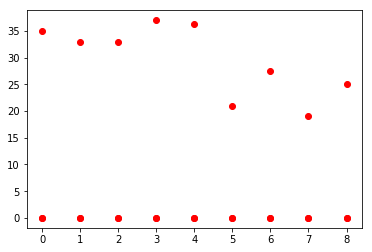

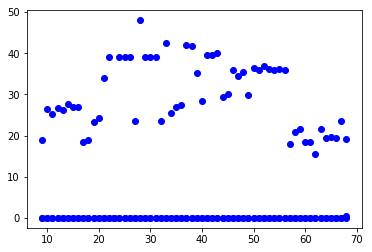

In [35]:
index = ["min_avg_rss12", "min_var_rss12", "min_var_rss23"]

ax = df_train_bend.plot(style='ro', legend=False)
df_train_all.plot(style='bo', legend=False)
plt.show()

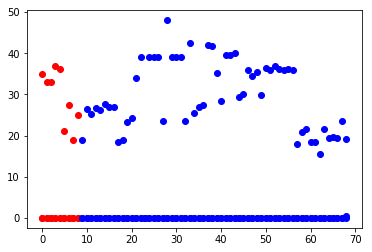

In [36]:
ax = df_train_bend.plot(style='ro', legend=False)
df_train_all.plot(style='bo',ax=ax, legend=False)
plt.show()

In [37]:
#B.

df_train_bend1 = dataframe_train.iloc[0:9, [0+6, 1+6, 5+6]]
#display(df_train_bend1)
df_train_bend1.head()


,max_avg_rss12,max_var_rss12,max_var_rss23
0,47.40,1.70,1.79
1,47.75,3.00,2.18
2,45.75,2.83,1.79
3,48.00,1.58,5.26
4,48.00,1.50,2.96


In [38]:
df_train_all1 = dataframe_train.iloc[9:70, [0+6, 1+6, 5+6]]
#display(df_train_all1)
df_train_all1.head()

,max_avg_rss12,max_var_rss12,max_var_rss23
9,44.00,12.28,9.98
10,44.33,12.89,8.19
11,45.00,10.84,9.50
12,44.75,11.68,8.81
13,44.25,8.64,8.34


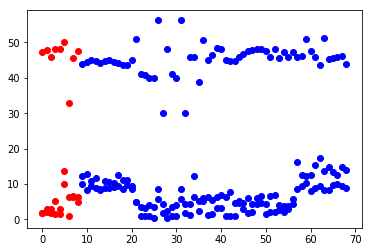

In [39]:
ax = df_train_bend1.plot(style='ro', legend=False)
df_train_all1.plot(style='bo',ax=ax, legend=False)
plt.show()

In [40]:
#C.

df_train_bend2 = dataframe_train.iloc[0:9, [0+12, 1+12, 5+12]]
#display(df_train_bend1)
df_train_bend2.head()



,mean_avg_rss12,mean_var_rss12,mean_var_rss23
0,43.954500,0.426250,0.493292
1,42.179813,0.696042,0.613521
2,41.678063,0.535979,0.383292
3,43.454958,0.378083,0.679646
4,43.969125,0.413125,0.555313


In [41]:
df_train_all2 = dataframe_train.iloc[9:70, [0+12, 1+12, 5+12]]
#display(df_train_all1)
df_train_all2.head()

,mean_avg_rss12,mean_var_rss12,mean_var_rss23
9,36.228396,2.831687,3.480687
10,36.687292,2.973042,3.073312
11,37.114312,2.730000,3.076354
12,36.863375,2.757312,2.773312
13,36.957458,2.420083,2.934625


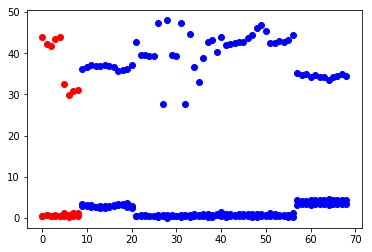

In [42]:
ax = df_train_bend2.plot(style='ro', legend=False)
df_train_all2.plot(style='bo',ax=ax, legend=False)
plt.show()

In [43]:
df_train_half1 = dataframe_train.iloc[0:35,:]
#display(df_train_half1)
df_train_half1.head()

,min_avg_rss12,min_var_rss12,min_avg_rss13,min_var_rss13,min_avg_rss23,min_var_rss23,max_avg_rss12,max_var_rss12,max_avg_rss13,max_var_rss13,max_avg_rss23,max_var_rss23,mean_avg_rss12,mean_var_rss12,mean_avg_rss13,mean_var_rss13,mean_avg_rss23,mean_var_rss23
0,35.00,0.0,6.50,0.0,29.00,0.0,47.40,1.70,29.75,4.44,38.50,1.79,43.954500,0.426250,22.122354,0.497313,35.588458,0.493292
1,33.00,0.0,8.50,0.0,20.00,0.0,47.75,3.00,30.00,5.15,38.67,2.18,42.179813,0.696042,22.183625,0.989917,33.493917,0.613521
2,33.00,0.0,3.00,0.0,23.67,0.0,45.75,2.83,28.25,6.42,37.50,1.79,41.678063,0.535979,19.006562,0.841875,29.857083,0.383292
3,37.00,0.0,5.75,0.0,8.00,0.0,48.00,1.58,27.00,10.03,33.50,5.26,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646
4,36.25,0.0,1.50,0.0,11.33,0.0,48.00,1.50,26.33,5.17,30.75,2.96,43.969125,0.413125,15.868021,0.666354,22.103750,0.555313


In [44]:
df_train_half2 = dataframe_train.iloc[36:,:]
#display(df_train_half2)
df_train_half2.head()

,min_avg_rss12,min_var_rss12,min_avg_rss13,min_var_rss13,min_avg_rss23,min_var_rss23,max_avg_rss12,max_var_rss12,max_avg_rss13,max_var_rss13,max_avg_rss23,max_var_rss23,mean_avg_rss12,mean_var_rss12,mean_avg_rss13,mean_var_rss13,mean_avg_rss23,mean_var_rss23
36,27.50,0.0,1.5,0.0,0.00,0.0,50.75,6.06,23.25,6.02,23.75,5.17,38.888375,0.383438,14.854167,0.654271,16.522021,0.840208
37,42.00,0.0,0.0,0.0,1.00,0.0,45.00,1.12,23.00,5.45,23.00,6.36,42.821983,0.335678,17.199708,0.531190,16.025658,0.856013
38,41.75,0.0,0.0,0.0,5.67,0.0,46.50,1.50,21.67,4.64,22.00,5.45,43.190854,0.266271,14.858313,0.510208,16.043167,0.806229
39,35.25,0.0,0.0,0.0,0.00,0.0,48.50,3.28,23.50,5.12,27.33,6.36,40.219271,0.617479,14.851229,0.872229,15.167271,1.057729
40,28.50,0.0,0.0,0.0,1.50,0.0,48.25,3.28,24.25,6.98,25.00,7.00,43.884833,0.517354,14.997375,1.047688,14.920542,1.354917


In [45]:
df_train_bend_half1 = df_train_half1.iloc[0:9, [0, 1, 5]]
#display(df_train_bend_half1)
df_train_bend_half1.head()

,min_avg_rss12,min_var_rss12,min_var_rss23
0,35.00,0.0,0.0
1,33.00,0.0,0.0
2,33.00,0.0,0.0
3,37.00,0.0,0.0
4,36.25,0.0,0.0


In [46]:
df_train_all_half1 = df_train_half1.iloc[9:, [0, 1, 5]]
#display(df_train_all)
df_train_all.head()

,min_avg_rss12,min_var_rss12,min_var_rss23
9,19.00,0.0,0.0
10,26.50,0.0,0.0
11,25.33,0.0,0.0
12,26.75,0.0,0.0
13,26.25,0.0,0.0


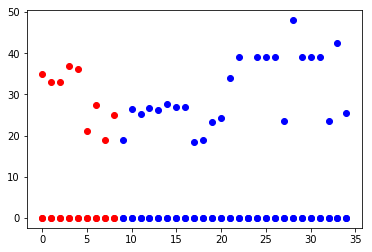

In [47]:
ax = df_train_bend_half1.plot(style='ro', legend=False)
df_train_all_half1.plot(style='bo',ax=ax, legend=False)
plt.show()

In [48]:
df_train_bend_half1 = df_train_half1.iloc[0:9, [0+6, 1+6, 5+6]]
#display(df_train_bend_half1)
df_train_bend_half1.head()

,max_avg_rss12,max_var_rss12,max_var_rss23
0,47.40,1.70,1.79
1,47.75,3.00,2.18
2,45.75,2.83,1.79
3,48.00,1.58,5.26
4,48.00,1.50,2.96


In [49]:
df_train_all_half1 = df_train_half1.iloc[9:, [0+6, 1+6, 5+6]]
#display(df_train_all)
df_train_all_half1.head()

,max_avg_rss12,max_var_rss12,max_var_rss23
9,44.00,12.28,9.98
10,44.33,12.89,8.19
11,45.00,10.84,9.50
12,44.75,11.68,8.81
13,44.25,8.64,8.34


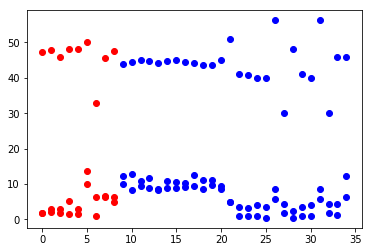

In [50]:
ax = df_train_bend_half1.plot(style='ro', legend=False)
df_train_all_half1.plot(style='bo',ax=ax, legend=False)
plt.show()

In [51]:
df_train_bend_half1 = df_train_half1.iloc[0:9, [0+12, 1+12, 5+12]]
#display(df_train_bend_half1)
df_train_bend_half1.head()

,mean_avg_rss12,mean_var_rss12,mean_var_rss23
0,43.954500,0.426250,0.493292
1,42.179813,0.696042,0.613521
2,41.678063,0.535979,0.383292
3,43.454958,0.378083,0.679646
4,43.969125,0.413125,0.555313


In [52]:
df_train_all_half1 = df_train_half1.iloc[9:, [0+12, 1+12, 5+12]]
#display(df_train_all)
df_train_all_half1.head()

,mean_avg_rss12,mean_var_rss12,mean_var_rss23
9,36.228396,2.831687,3.480687
10,36.687292,2.973042,3.073312
11,37.114312,2.730000,3.076354
12,36.863375,2.757312,2.773312
13,36.957458,2.420083,2.934625


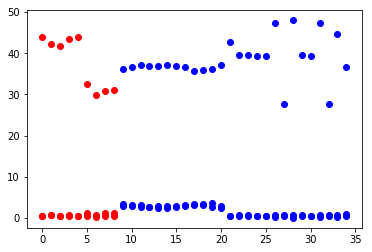

In [53]:
ax = df_train_bend_half1.plot(style='ro', legend=False)
df_train_all_half1.plot(style='bo',ax=ax, legend=False)
plt.show()

In [54]:
#from_here it is for half2

In [55]:
df_train_bend_half2 = df_train_half2.iloc[0:9, [0, 1, 5]]
#display(df_train_bend_half1)
df_train_bend_half2.head()

,min_avg_rss12,min_var_rss12,min_var_rss23
36,27.50,0.0,0.0
37,42.00,0.0,0.0
38,41.75,0.0,0.0
39,35.25,0.0,0.0
40,28.50,0.0,0.0


In [56]:
df_train_all_half2 = df_train_half2.iloc[9:, [0, 1, 5]]
#display(df_train_all)
df_train_all.head()

,min_avg_rss12,min_var_rss12,min_var_rss23
9,19.00,0.0,0.0
10,26.50,0.0,0.0
11,25.33,0.0,0.0
12,26.75,0.0,0.0
13,26.25,0.0,0.0


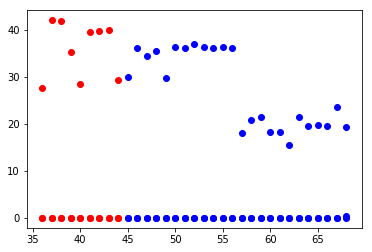

In [57]:
ax = df_train_bend_half2.plot(style='ro', legend=False)
df_train_all_half2.plot(style='bo',ax=ax, legend=False)
plt.show()

In [58]:
df_train_bend_half2 = df_train_half2.iloc[0:9, [0+6, 1+6, 5+6]]
#display(df_train_bend_half1)
df_train_bend_half2.head()

,max_avg_rss12,max_var_rss12,max_var_rss23
36,50.75,6.06,5.17
37,45.00,1.12,6.36
38,46.50,1.50,5.45
39,48.50,3.28,6.36
40,48.25,3.28,7.00


In [59]:
df_train_all_half2 = df_train_half2.iloc[9:, [0+6, 1+6, 5+6]]
#display(df_train_all)
df_train_all.head()

,min_avg_rss12,min_var_rss12,min_var_rss23
9,19.00,0.0,0.0
10,26.50,0.0,0.0
11,25.33,0.0,0.0
12,26.75,0.0,0.0
13,26.25,0.0,0.0


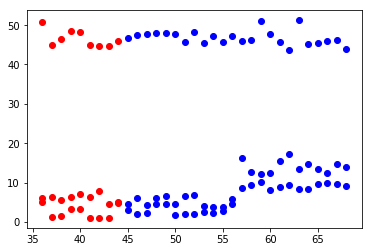

In [60]:
ax = df_train_bend_half2.plot(style='ro', legend=False)
df_train_all_half2.plot(style='bo',ax=ax, legend=False)
plt.show()

In [61]:
df_train_bend_half2 = df_train_half2.iloc[0:9, [0+12, 1+12, 5+12]]
#display(df_train_bend_half1)
df_train_bend_half2.head()

,mean_avg_rss12,mean_var_rss12,mean_var_rss23
36,38.888375,0.383438,0.840208
37,42.821983,0.335678,0.856013
38,43.190854,0.266271,0.806229
39,40.219271,0.617479,1.057729
40,43.884833,0.517354,1.354917


In [62]:
df_train_all_half2 = df_train_half2.iloc[9:, [0+12, 1+12, 5+12]]
#display(df_train_all)
df_train_all.head()

,min_avg_rss12,min_var_rss12,min_var_rss23
9,19.00,0.0,0.0
10,26.50,0.0,0.0
11,25.33,0.0,0.0
12,26.75,0.0,0.0
13,26.25,0.0,0.0


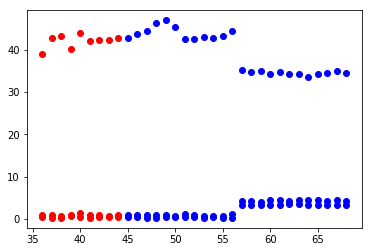

In [63]:
ax = df_train_bend_half2.plot(style='ro', legend=False)
df_train_all_half2.plot(style='bo',ax=ax, legend=False)
plt.show()

In [64]:
#Diving the data into l=(1,2,3....10)

In [65]:
for l in range(2,10):
    
    training_data_split = np.array_split(data_bend1_train1,l)
    a=l
    #print a
    for i in range(0,a):   
        #print i
        dt1 = training_data_split[i]
        
        #display(dt1)
        dt1.head()
    #print "hiii"       



In [66]:
###########################################################################################################

In [67]:
#For Extended (Training):
total_columns =['min_avg_rss12','min_var_rss12','min_avg_rss13','min_var_rss13','min_avg_rss23',
                'min_var_rss23','max_avg_rss12','max_var_rss12','max_avg_rss13','max_var_rss13',
                'max_avg_rss23','max_var_rss23','mean_avg_rss12','mean_var_rss12','mean_avg_rss13',
                'mean_var_rss13','mean_avg_rss23','mean_var_rss23','median_avg_rss12','median_var_rss12',
                'median_avg_rss13','median_var_rss13','median_avg_rss23','median_var_rss23','std_avg_rss12',
                'std_var_rss12','std_avg_rss13','std_var_rss13','std_avg_rss23','std_var_rss23','q25_avg_rss12',
                'q25_var_rss12','q25_avg_rss13','q25_var_rss13','q25_avg_rss23','q25_var_rss23','q75_avg_rss12',
                'q75_var_rss12','q75_avg_rss13','q75_var_rss13','q75_avg_rss23','q75_var_rss23']
print len(total_columns)
#print len(total_columns)
#dataframe_train_1 = pd.DataFrame(columns=total_columns)
#d={}
#mylist = [data_bend1_train1,data_bend1_train2,data_bend1_train3,data_bend1_train4,data_bend1_train5,data_bend2_train6,
         # data_bend2_train7,data_bend2_train8,data_bend2_train9,]
mylist = [data_bend1_train1,data_bend1_train2,data_bend1_train3,data_bend1_train4,data_bend1_train5,data_bend2_train6,
          data_bend2_train7,data_bend2_train8,data_bend2_train9,
          data_cycling_train10,data_cycling_train11,data_cycling_train12,data_cycling_train13,
          data_cycling_train14,data_cycling_train15,data_cycling_train16,data_cycling_train17,data_cycling_train18,
          data_cycling_train19,
          data_cycling_train21,data_lying_train22,data_lying_train23,data_lying_train24,data_lying_train25,
          data_lying_train26,data_lying_train27,
         data_lying_train28,data_lying_train29,data_lying_train30,data_lying_train31,data_lying_train32,data_lying_train33,
         data_sitting_train34,data_sitting_train35,data_sitting_train36,data_sitting_train37,data_sitting_train38,
          data_sitting_train39,data_sitting_train40,
         data_sitting_train41,data_sitting_train42,data_sitting_train43,data_sitting_train44,data_sitting_train45,
          data_standing_train46,data_standing_train47,
        data_standing_train48,data_standing_train49,data_standing_train50,data_standing_train51,data_standing_train52,
          data_standing_train53,data_standing_train54,
        data_standing_train55,data_standing_train56,data_standing_train57,data_walking_train58,data_walking_train59,
          data_walking_train60,data_walking_train61,
        data_walking_train62,data_walking_train63,data_walking_train64,data_walking_train65,data_walking_train66,
          data_walking_train67,
        data_walking_train68,data_walking_train69]
#print type(mylist[0])
m=1
dataframe_train = pd.DataFrame(columns=total_columns)
for j in mylist:
    #print j
    #eval('dataframe_train_'+str(l))
    #d["dataframe_train_{0}".format(j)]=pd.DataFrame(columns=total_columns);
   #print d
    
    #print dataframe_train
    #print "hii"
    training_data_split = np.array_split(j,9)
    #display(training_data_split)
    #print training_data_split[0]
    a=9
    rows =[]
    
        #print a
    for i in range(0,a):   
        #print i
        dt1 = training_data_split[i]
        dt1_mean = dt1.mean()
        dt1_max = dt1.max()
        dt1_min = dt1.min()
        dt1_median = dt1.median()
        dt1_std = dt1.std()
        dt1_q25 = dt1.quantile(0.25)
        dt1_q75 = dt1.quantile(0.50)
        #dt1_mode = dt1.mode()
        array2 = [dt1_min[1:],dt1_max[1:],dt1_mean[1:],dt1_median[1:],dt1_std[1:],dt1_q25[1:],dt1_q75[1:]]
        #print len(array2)
        #display(dataframe_train_1.shape)
        #print len(array2)
        #print "im here"
        #print len(list(itertools.chain.from_iterable(array2)))
        #print [list(itertools.chain.from_iterable(array2))]
        #dataframe_train_1.loc[i] = list(itertools.chain.from_iterable(array2))
        
        dataframe_train.loc[m] = list(itertools.chain.from_iterable(array2))
        m=m+1
        #print m
        #print "i="+str(i)
        #print "l="+str(l)
        #display(dataframe_train_1)
  #      dataframe_train_1
        #print dt1_mean
        
        #display(dt1)
    #print "hiii" 

42


In [68]:
#we have seleted L=9 based on the p values of all the l{1,2,3.....10} and also based on the 5-fold cross validation score
#display(dataframe_train)
dataframe_train.head()
#print dataframe_train[]

,min_avg_rss12,min_var_rss12,min_avg_rss13,min_var_rss13,min_avg_rss23,min_var_rss23,max_avg_rss12,max_var_rss12,max_avg_rss13,max_var_rss13,...,q25_avg_rss13,q25_var_rss13,q25_avg_rss23,q25_var_rss23,q75_avg_rss12,q75_var_rss12,q75_avg_rss13,q75_var_rss13,q75_avg_rss23,q75_var_rss23
1,40.00,0.0,14.25,0.0,30.00,0.0,45.0,0.87,24.75,2.74,...,23.5425,0.00,36.0,0.0000,44.5,0.47,24.000,0.00,36.00,0.00
2,41.50,0.0,20.75,0.0,35.25,0.0,45.0,1.00,25.00,1.64,...,23.0000,0.00,36.0,0.1075,43.5,0.47,23.875,0.43,36.50,0.50
3,38.75,0.0,18.33,0.0,33.00,0.0,46.5,1.50,29.00,1.48,...,21.8125,0.43,36.0,0.4400,45.0,0.43,24.000,0.50,37.25,0.66
4,36.50,0.0,16.50,0.0,32.50,0.0,46.5,1.48,29.25,2.29,...,20.3300,0.00,36.0,0.0000,45.0,0.50,23.000,0.50,36.50,0.94
5,42.67,0.0,18.00,0.0,33.00,0.0,46.5,0.94,26.67,1.30,...,20.0000,0.00,34.5,0.0000,45.0,0.43,21.750,0.43,36.00,0.83


In [69]:
#dataframe_train.describe()

In [70]:
dataframe_train.shape

(612, 42)

In [71]:
a = [0] * 81
b = [1]* 108
c = [1]* 108
d = [1]* 108
e = [1]* 108
f = [1]* 99


#print y

# 0- Bending 
# 1 -Not Bending(i.e any activity but bending)
# we do this for binary classification
#going further we will see multiclass classification

In [72]:
X_train_allf = dataframe_train.as_matrix()
y_train_allf = a+b+c+d+e+f
print len(y_train_allf)


X_train, X_test, y_train, y_test = train_test_split(X_train_allf, y_train_allf, test_size=0.30, random_state=0)

logreg_train_allf = LogisticRegression(solver='newton-cg',C=5.0)
result1 = logreg_train_allf.fit(X_train, y_train)
print result1

612
LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


In [73]:
y_pred_train_allf = logreg_train_allf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_allf.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [74]:
score = logreg_train_allf.score(X_test,y_test)
print(score)

0.9402173913043478


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_train_allf)
confusion_matrix

array([[ 22,   4],
       [  7, 151]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_allf))

             precision    recall  f1-score   support

          0       0.76      0.85      0.80        26
          1       0.97      0.96      0.96       158

avg / total       0.94      0.94      0.94       184



In [77]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False False False  True False  True  True False
  True  True False  True False False  True  True False False False False
 False  True  True  True  True False False  True False  True False False
  True  True False False False False]
[ 1  7  1 22 18  8  5  1  2  1  1 17  1  1 10  1 24  3  1  1 16 13 20 15
 11  1  1  1  1 21 12  1 25  1 23 14  1  1  4  9  6 19]


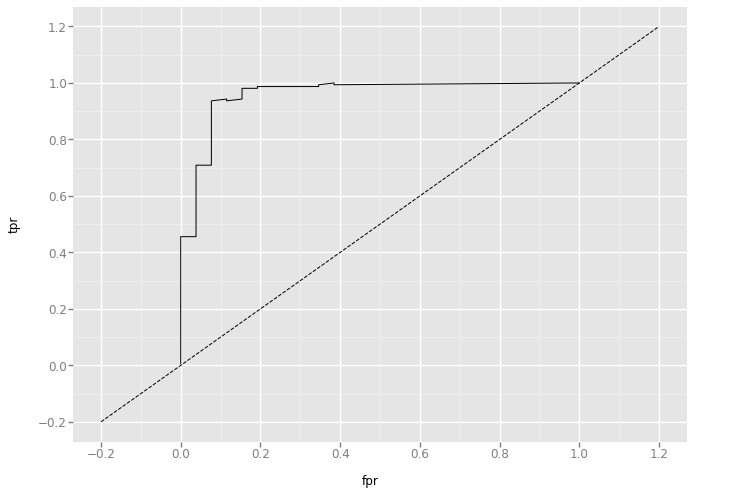

<ggplot: (24691362)>

In [78]:


preds = logreg_train_allf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

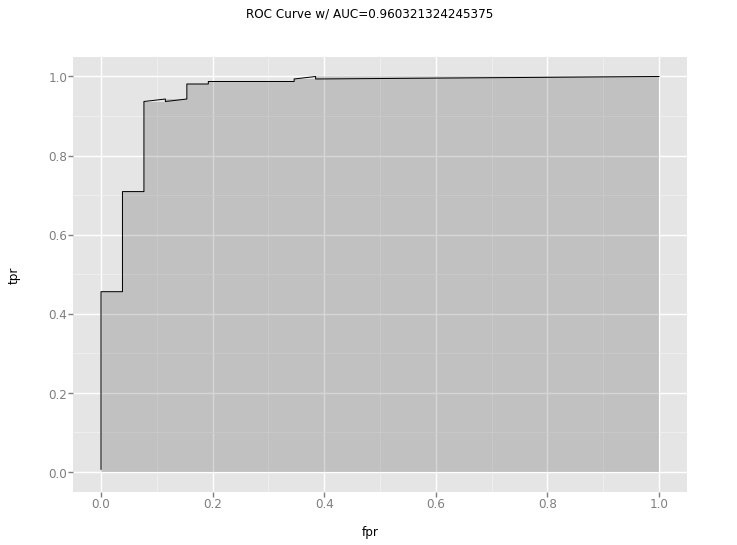

<ggplot: (22292438)>

In [79]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [80]:


stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.059429
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  428
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                           35
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                  0.8450
Time:                        20:36:57   Log-Likelihood:                -25.436
converged:                      False   LL-Null:                       -164.15
                                        LLR p-value:                 1.671e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4324      0.891      0.485      0.628      -1.315       2.179
x2            49.4706   3.55e+04      0.001      0.999   -6.96e+0

c:\python27\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\python27\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
c:\python27\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\python27\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\python27\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [81]:

X_shuf, Y_shuf = shuffle(X_train, y_train)


kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
#print Y_shuf
results = model_selection.cross_val_score(modelCV, X_shuf, Y_shuf, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.932


In [82]:
############################################################################################################################

In [83]:
#After Feature selecting for l=9,and fiting LogReg and plotting ROC and AUC

In [84]:
dataframe_train_selected_f = dataframe_train.iloc[:, [2,9,10,11,14,15,16,17,18,19,20,22,28,29]]


In [85]:
X_train_selectedf = dataframe_train_selected_f.as_matrix()

y_train_selectedf = a+b+c+d+e+f


print len(y_train_selectedf)


X_train, X_test, y_train, y_test = train_test_split(X_train_selectedf,y_train_selectedf, test_size=0.30, random_state=0)

logreg_train_selectedf = LogisticRegression(solver='newton-cg',C=5.0)
result2 = logreg_train_selectedf.fit(X_train, y_train)
print result2

612
LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


In [86]:
y_pred_train_selectedf = logreg_train_selectedf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_selectedf.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [87]:
score = logreg_train_selectedf.score(X_test,y_test)
print(score)


0.967391304347826


In [88]:
#print logistic regression coefficients
print logreg_train_selectedf.coef_

[[ 0.20419005 -0.37276074 -0.44371708  0.02798226 -0.48128846  1.83558932
  -0.37176504 -0.75134339  0.26951062  2.41818192  0.43254436  0.1375229
   0.71471103 -0.45645945]]


In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix_sel = confusion_matrix(y_test,y_pred_train_selectedf)
confusion_matrix_sel

array([[ 24,   2],
       [  4, 154]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_selectedf))

             precision    recall  f1-score   support

          0       0.86      0.92      0.89        26
          1       0.99      0.97      0.98       158

avg / total       0.97      0.97      0.97       184



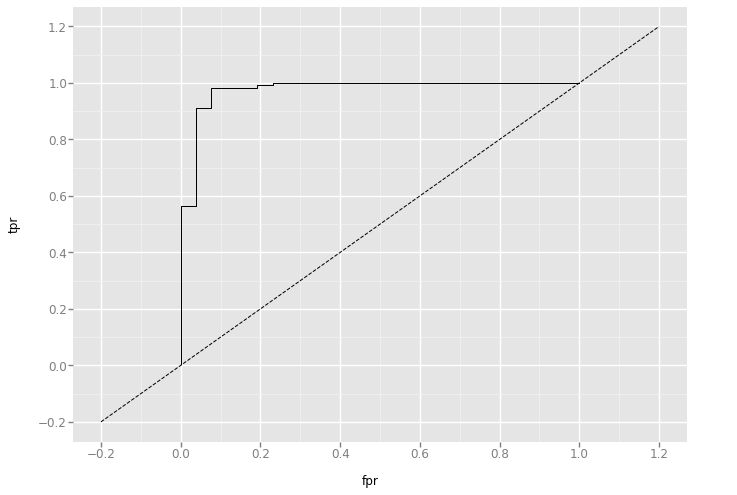

<ggplot: (25351267)>

In [91]:

preds = logreg_train_selectedf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

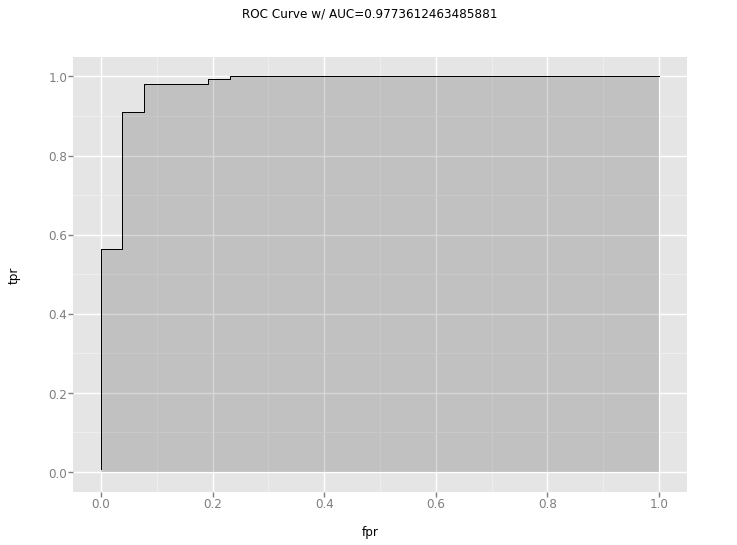

<ggplot: (24888941)>

In [92]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [93]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [94]:


from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#y=[int(i) for i in y]
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.102080
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  428
Model:                          Logit   Df Residuals:                      414
Method:                           MLE   Df Model:                           13
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                  0.7338
Time:                        20:37:01   Log-Likelihood:                -43.690
converged:                       True   LL-Null:                       -164.15
                                        LLR p-value:                 4.891e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2315      0.128      1.807      0.071      -0.020       0.483
x2            -0.4755      0

In [95]:

X_shuf, Y_shuf = shuffle(X_train, y_train)


kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
#print Y_shuf
results = model_selection.cross_val_score(modelCV, X_shuf, Y_shuf, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.939


In [96]:
#############################################################################################################################

In [97]:
# Breaking test set into the same number of sets as done for training

In [98]:

total_columns =['min_avg_rss12','min_var_rss12','min_avg_rss13','min_var_rss13','min_avg_rss23','min_var_rss23','max_avg_rss12','max_var_rss12','max_avg_rss13','max_var_rss13','max_avg_rss23','max_var_rss23','mean_avg_rss12','mean_var_rss12','mean_avg_rss13','mean_var_rss13','mean_avg_rss23','mean_var_rss23','median_avg_rss12','median_var_rss12','median_avg_rss13','median_var_rss13','median_avg_rss23','median_var_rss23','std_avg_rss12','std_var_rss12','std_avg_rss13','std_var_rss13','std_avg_rss23','std_var_rss23','q25_avg_rss12','q25_var_rss12','q25_avg_rss13','q25_var_rss13','q25_avg_rss23','q25_var_rss23','q75_avg_rss12','q75_var_rss12','q75_avg_rss13','q75_var_rss13','q75_avg_rss23','q75_var_rss23']
#print len(total_columns)
#dataframe_train_1 = pd.DataFrame(columns=total_columns)
#d={}
mylist = [data_bend1_test1,data_bend1_test2,data_bend2_test1,data_bend2_test2,data_cycling_test1,data_cycling_test2,
          data_cycling_test3,data_lying_test1,data_lying_test2,data_lying_test3,data_sitting_test1,data_sitting_test2,data_sitting_test3,
  data_standing_test1,data_standing_test2,data_standing_test3,data_walking_test1,data_walking_test2,data_walking_test3]
 
#print type(mylist[0])
m=1
dataframe_test = pd.DataFrame(columns=total_columns)
for j in mylist:
    #print j
    #eval('dataframe_train_'+str(l))
    #d["dataframe_train_{0}".format(j)]=pd.DataFrame(columns=total_columns);
   #print d
    
    #print dataframe_train
    #print "hii"
    training_data_split = np.array_split(j,9)
    #display(training_data_split)
    #print training_data_split[0]
    a=9
    rows =[]
    
        #print a
    for i in range(0,a):   
        #print i
        dt1 = training_data_split[i]
        dt1_mean = dt1.mean()
        dt1_max = dt1.max()
        dt1_min = dt1.min()
        dt1_median = dt1.median()
        dt1_std = dt1.std()
        dt1_q25 = dt1.quantile(0.25)
        dt1_q75 = dt1.quantile(0.50)
        array3 = [dt1_min[1:],dt1_max[1:],dt1_mean[1:],dt1_median[1:],dt1_std[1:],dt1_q25[1:],dt1_q75[1:] ]
        #display(dataframe_train_1.shape)
        #print len(array2)
        #print "im here"
        #print len(list(itertools.chain.from_iterable(array2)))
        #print [list(itertools.chain.from_iterable(array2))]
        #dataframe_train_1.loc[i] = list(itertools.chain.from_iterable(array2))
        
        dataframe_test.loc[m] = list(itertools.chain.from_iterable(array3))
        m=m+1
        #print m
        #print "i="+str(i)
        #print "l="+str(l)
        #display(dataframe_train_1)
  #      dataframe_train_1
        #print dt1_mean
        
        #display(dt1)
    #print "hiii" 

In [99]:
dataframe_test_selected_f = dataframe_test.iloc[:, [2,9,10,11,14,15,16,17,18,19,20,22,28,29]]


In [100]:
X_test_selectedf = dataframe_train_selected_f.as_matrix()

a = [0] * 81
b = [1]* 108
c = [1]* 108
d = [1]* 108
e = [1]* 108
f = [1]* 99
y_test_selectedf = a+b+c+d+e+f


In [101]:
y_pred_test_selectedf = logreg_train_selectedf.predict(X_test_selectedf)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_selectedf.score(X_test_selectedf,y_test_selectedf)))

Accuracy of logistic regression classifier on test set: 0.96


In [102]:
score = logreg_train_selectedf.score(X_test_selectedf,y_test_selectedf)
print(score)

0.9558823529411765


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix_sel_test = confusion_matrix(y_test_selectedf,y_pred_test_selectedf)
confusion_matrix_sel_test

array([[ 66,  15],
       [ 12, 519]], dtype=int64)

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test_selectedf,y_pred_test_selectedf))

             precision    recall  f1-score   support

          0       0.85      0.81      0.83        81
          1       0.97      0.98      0.97       531

avg / total       0.96      0.96      0.96       612



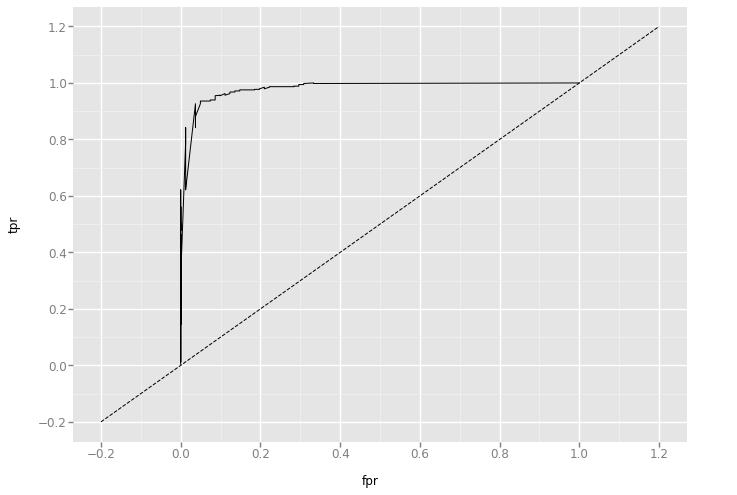

<ggplot: (24821438)>

In [105]:

preds = logreg_train_selectedf.predict_proba(X_test_selectedf)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test_selectedf, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

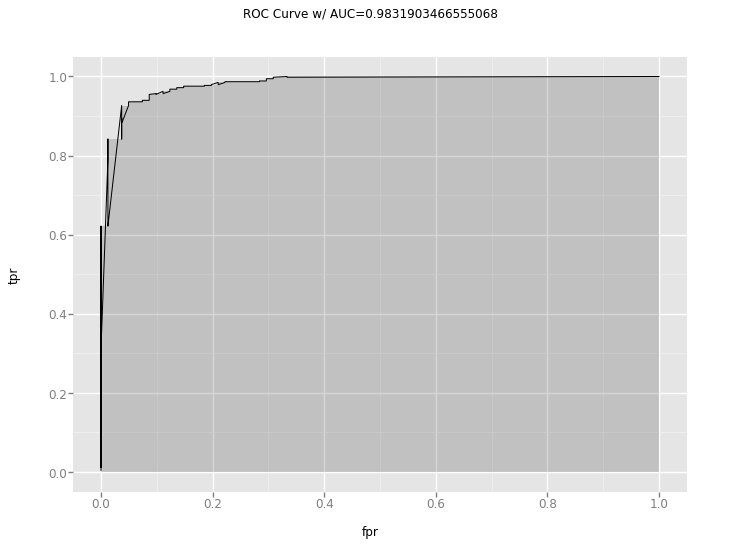

<ggplot: (22404710)>

In [106]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [107]:


from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#y=[int(i) for i in y]
import statsmodels.api as sm
logit_model=sm.Logit(y_test_selectedf,X_test_selectedf)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.100896
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  612
Model:                          Logit   Df Residuals:                      598
Method:                           MLE   Df Model:                           13
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                  0.7418
Time:                        20:37:09   Log-Likelihood:                -61.749
converged:                       True   LL-Null:                       -239.19
                                        LLR p-value:                 7.276e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1725      0.111      1.561      0.119      -0.044       0.389
x2            -0.6500      0

In [108]:
############################################################################################################################

In [109]:
#Case-control sampling and adjust its parameters.

In [110]:
X_case_control = dataframe_train_selected_f.as_matrix()

y_case_control = a+b+c+d+e+f



from sklearn.linear_model import SGDClassifier
Case_controlling = SGDClassifier(loss="hinge", penalty="l2")
Case_controlling.fit(X_case_control, y_case_control)

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [111]:
Case_controlling.coef_

array([[ 200.56664203,  147.22838137, -392.38728751,  426.21335304,
          52.94750956,  239.67781994, -371.08307599,  239.58791611,
         611.36979552,  331.42399606,   64.05518601, -335.25498891,
          60.55295443,  100.56821989]])

In [112]:
Case_controlling.intercept_ 

array([49.8266438])

In [113]:
Case_controlling.decision_function(X_case_control)  

array([-5.60455820e+03, -5.59947818e+03, -5.83971311e+03, -5.60590312e+03,
       -5.04015861e+03, -3.87035333e+03, -4.61182808e+03, -7.22206881e+03,
       -6.42160813e+03, -4.90574872e+03, -7.27619302e+03, -5.11944303e+03,
       -5.42097679e+03, -4.78646784e+03, -5.21310911e+03, -4.55713513e+03,
       -1.37305500e+03, -2.28923515e+03, -4.47599179e+03, -8.21362213e+02,
       -4.30967475e+03, -4.09249523e+03, -2.75815893e+03, -4.27104467e+03,
       -6.64462295e+02, -1.39288728e+03,  1.45842358e+02,  2.94770851e+03,
        8.12724194e+03,  9.57205193e+03,  7.27777484e+03,  5.99794482e+03,
        5.15881551e+03,  4.26265085e+03,  4.45244057e+03,  6.84876238e+03,
        4.99215555e+03, -8.20102696e+02,  4.90510914e+03,  9.63961864e+03,
        8.82681868e+03,  5.17025376e+03,  8.90202217e+03,  7.80370344e+03,
        5.64700244e+03, -5.56619164e+03, -2.44628075e+03, -5.75800141e+03,
        1.00696477e+04,  2.36332219e+03,  8.39201764e+03,  4.36659425e+03,
        1.55786106e+03,  

In [114]:
y_pred_train_selectedf_case_control = logreg_train_selectedf.predict(X_case_control)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_selectedf.score(X_train_selectedf,y_train_selectedf)))

Accuracy of logistic regression classifier on test set: 0.96


In [115]:
result_s=Case_controlling.score(X_case_control, y_case_control)
#print result_s
Case_controlling.sparsify()


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [116]:
X_case_control_new = dataframe_train_selected_f.as_matrix()

y_case_control_new = a+b+c+d+e+f


print len(y_train_selectedf)


X_train, X_test, y_train, y_test = train_test_split(X_case_control_new, y_case_control_new, test_size=0.30, random_state=0)

logreg_train_selectedf_cc = LogisticRegression(solver='newton-cg',C=5.0,class_weight='balanced')
result3 = logreg_train_selectedf_cc.fit(X_train, y_train)
print result3

612
LogisticRegression(C=5.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)


In [117]:
y_pred_train_selectedf_cc = logreg_train_selectedf_cc.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_selectedf_cc.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [118]:
score = logreg_train_selectedf_cc.score(X_test,y_test)
print(score)


0.9130434782608695


In [119]:
#print logistic regression coefficients
print logreg_train_selectedf_cc.coef_

[[ 0.24884878 -0.22449985 -0.27527102  0.0382218  -0.78046727  1.61276564
  -0.64780574 -0.49431462  0.3840761   3.13601066  0.56950556  0.18628428
   0.48071756 -0.96760922]]


In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix_sel = confusion_matrix(y_test,y_pred_train_selectedf_cc)
confusion_matrix_sel

array([[ 24,   2],
       [ 14, 144]], dtype=int64)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_selectedf_cc))

             precision    recall  f1-score   support

          0       0.63      0.92      0.75        26
          1       0.99      0.91      0.95       158

avg / total       0.94      0.91      0.92       184



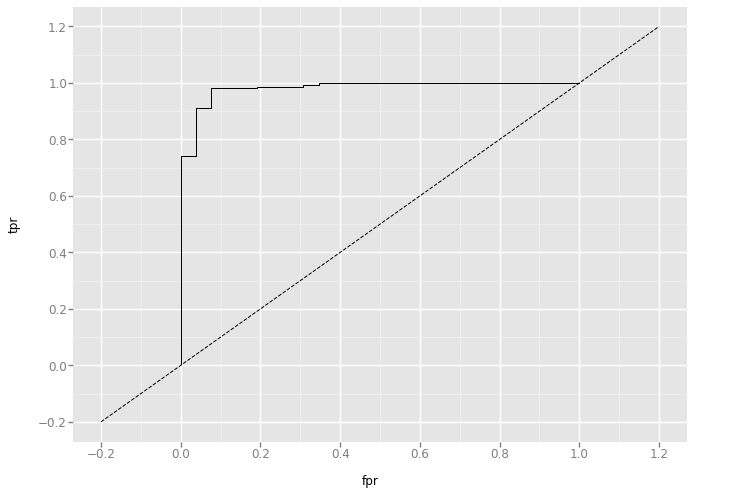

<ggplot: (24972923)>

In [122]:

preds = logreg_train_selectedf_cc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

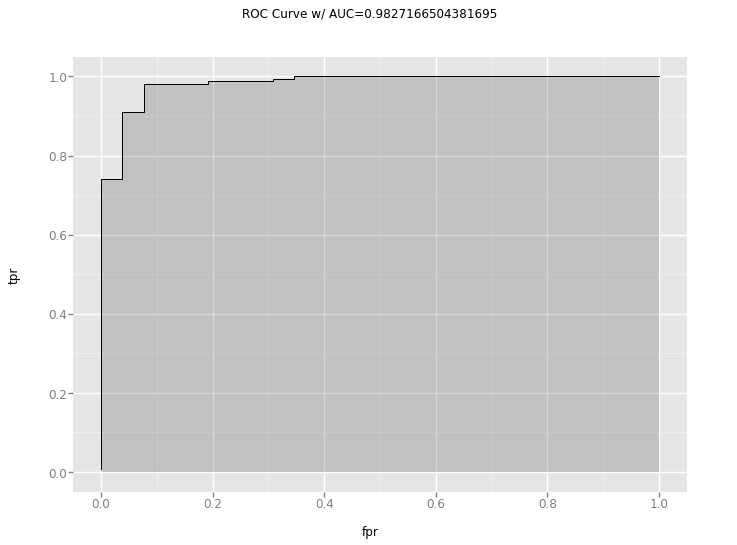

<ggplot: (22932645)>

In [123]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [124]:
###############################################################################################################

In [125]:
#1.e

In [126]:
#L-1 Penalised

In [127]:
a = [0] * 81
b = [1]* 108
c = [1]* 108
d = [1]* 108
e = [1]* 108
f = [1]* 99

In [128]:
X_train_allf_l1 = dataframe_train.as_matrix()
y_train_allf_l1 = a+b+c+d+e+f
print len(y_train_allf_l1)


X_train, X_test, y_train, y_test = train_test_split(X_train_allf_l1, y_train_allf_l1, test_size=0.30, random_state=0)

logreg_train_allf_l1 = LogisticRegression(penalty='l1', class_weight='balanced', C=1)
result3 = logreg_train_allf_l1.fit(X_train, y_train)
print result3

612
LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [129]:
y_pred_train_allf_l1 = logreg_train_allf_l1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_allf_l1.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [130]:
score = logreg_train_allf_l1.score(X_test,y_test)
print(score)

0.9293478260869565


In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix_l1 = confusion_matrix(y_test,y_pred_train_allf_l1)
confusion_matrix_l1

array([[ 24,   2],
       [ 11, 147]], dtype=int64)

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_allf_l1))

             precision    recall  f1-score   support

          0       0.69      0.92      0.79        26
          1       0.99      0.93      0.96       158

avg / total       0.94      0.93      0.93       184



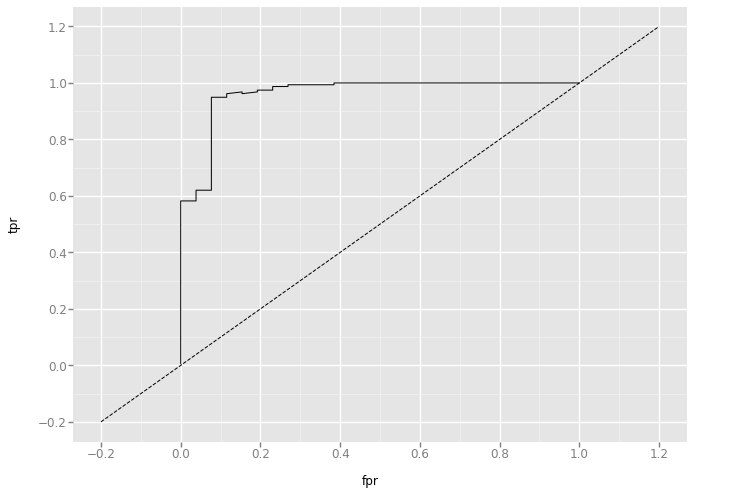

<ggplot: (25615858)>

In [133]:


preds = logreg_train_allf_l1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

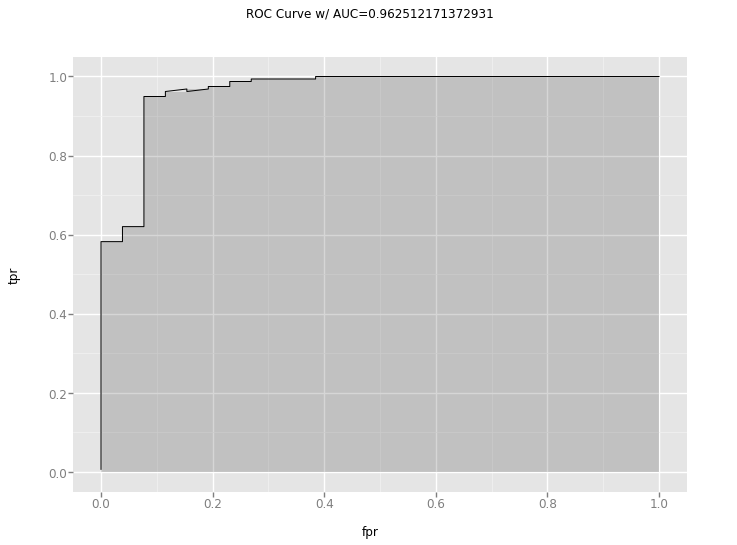

<ggplot: (22421571)>

In [134]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [135]:


stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.059429
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  428
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                           35
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                  0.8450
Time:                        20:37:18   Log-Likelihood:                -25.436
converged:                      False   LL-Null:                       -164.15
                                        LLR p-value:                 1.671e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4324      0.891      0.485      0.628      -1.315       2.179
x2            49.4706   3.55e+04      0.001      0.999   -6.96e+0

c:\python27\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [136]:

X_shuf, Y_shuf = shuffle(X_train, y_train)


kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
#print Y_shuf
results = model_selection.cross_val_score(modelCV, X_shuf, Y_shuf, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.949


In [137]:
#############################################################################################################

In [138]:
#.f--Multi-class Classification


In [139]:
a = [0] * 81

b = [1]* 108

c = [2]* 108

d = [3]* 108
e = [4]* 108
f = [5]* 99

#print len(y)

In [140]:
# Here we label for multiclass so we assign 
# '0'- Bending
# '1' - cycling
# '2' - lying
# '3' - sitting
# '4' - standing
# '5' - walking


In [141]:
X_train_allf_l1_multi = dataframe_train.as_matrix()
y_train_allf_l1_multi = a+b+c+d+e+f
print len(y_train_allf_l1)


X_train, X_test, y_train, y_test = train_test_split(X_train_allf_l1_multi, y_train_allf_l1_multi, test_size=0.30, random_state=0)

logreg_train_allf_l1_multi = LogisticRegression(penalty='l1', class_weight='balanced', C=1,multi_class='multinomial',solver='saga')
result3 = logreg_train_allf_l1_multi.fit(X_train, y_train)
print result3

612
LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l1',
          random_state=None, solver='saga', tol=0.0001, verbose=0,
          warm_start=False)


c:\python27\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [142]:
y_pred_train_allf_l1_multi = logreg_train_allf_l1_multi.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_allf.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.26


In [143]:
score = logreg_train_allf.score(X_test,y_test)
print(score)

0.2554347826086957


In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_train_allf_l1_multi)
confusion_matrix

array([[23,  0,  0,  3,  0,  0],
       [ 0, 22,  1,  1,  1,  0],
       [ 0,  1, 27,  5,  3,  0],
       [ 9,  0,  4, 16,  5,  0],
       [ 0,  0,  5,  7, 21,  1],
       [ 0,  0,  0,  0,  0, 29]], dtype=int64)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_allf_l1_multi))

             precision    recall  f1-score   support

          0       0.72      0.88      0.79        26
          1       0.96      0.88      0.92        25
          2       0.73      0.75      0.74        36
          3       0.50      0.47      0.48        34
          4       0.70      0.62      0.66        34
          5       0.97      1.00      0.98        29

avg / total       0.75      0.75      0.75       184



In [146]:

X_shuf, Y_shuf = shuffle(X_train, y_train)


kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
#print Y_shuf
results = model_selection.cross_val_score(modelCV, X_shuf, Y_shuf, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.736


In [147]:
########*********************############****************************##############**********************##################

In [148]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result1 = nb.fit(X_train,y_train )
print result1

nb.score(X_train_allf_l1_multi,y_train_allf_l1_multi )

GaussianNB(priors=None)


0.6977124183006536

In [149]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
result2 = nb.fit(X_train,y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print result2
nb.score(X_train_allf_l1_multi,y_train_allf_l1_multi)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


0.7124183006535948

In [150]:
###################################################################################################################################

In [151]:
### EXTRA*****************************************EXTRA*****************************

In [152]:
#### repeating 1.e and 1.f on the selected features i.e for the classifer built

In [153]:
dataframe_train_selected_f1 = dataframe_train.iloc[:, [2,9,10,11,14,15,16,17,18,19,20,22,28,29]]

dataframe_train_selected_f1.shape

(612, 14)

In [154]:
a = [0] * 81
b = [1]* 108
c = [1]* 108
d = [1]* 108
e = [1]* 108
f = [1]* 99

In [155]:
X_train_allf_l1_x = dataframe_train_selected_f1.as_matrix()
y_train_allf_l1_x = a+b+c+d+e+f
print len(y_train_allf_l1)


X_train, X_test, y_train, y_test = train_test_split(X_train_allf_l1_x, y_train_allf_l1_x, test_size=0.30, random_state=0)

logreg_train_allf_l1 = LogisticRegression(penalty='l1', class_weight='balanced', C=1)
result3 = logreg_train_allf_l1.fit(X_train, y_train)
print result3

612
LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [156]:
y_pred_train_allf_l1 = logreg_train_allf_l1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_allf_l1.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [157]:
score = logreg_train_allf_l1.score(X_test,y_test)
print(score)

0.9184782608695652


In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix_l1 = confusion_matrix(y_test,y_pred_train_allf_l1)
confusion_matrix_l1

array([[ 25,   1],
       [ 14, 144]], dtype=int64)

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_allf_l1))

             precision    recall  f1-score   support

          0       0.64      0.96      0.77        26
          1       0.99      0.91      0.95       158

avg / total       0.94      0.92      0.92       184



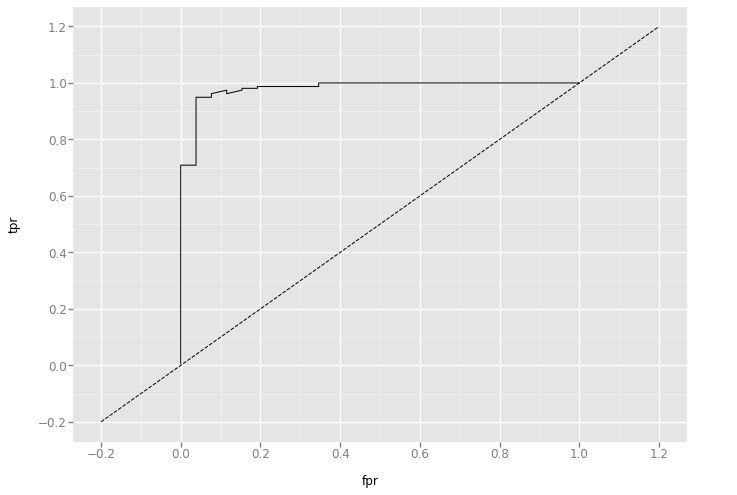

<ggplot: (21928014)>

In [160]:


preds = logreg_train_allf_l1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

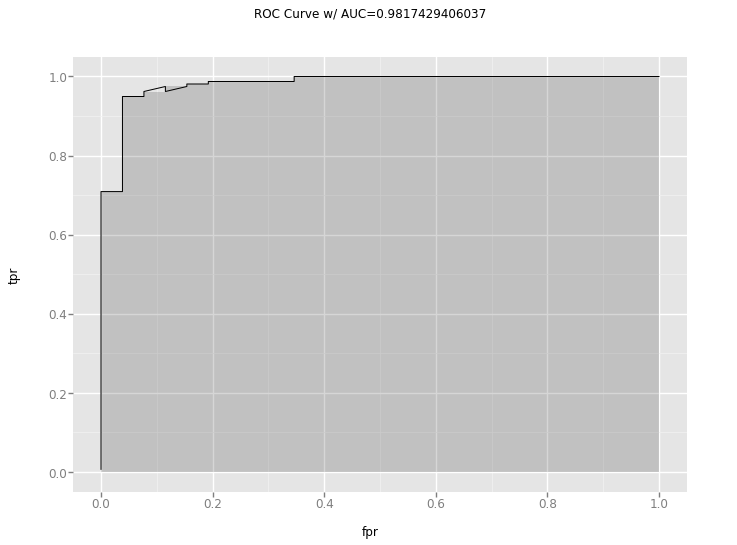

<ggplot: (23258646)>

In [161]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr',y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [162]:


stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.102080
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  428
Model:                          Logit   Df Residuals:                      414
Method:                           MLE   Df Model:                           13
Date:                Sun, 18 Feb 2018   Pseudo R-squ.:                  0.7338
Time:                        20:37:27   Log-Likelihood:                -43.690
converged:                       True   LL-Null:                       -164.15
                                        LLR p-value:                 4.891e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2315      0.128      1.807      0.071      -0.020       0.483
x2            -0.4755      0

In [163]:

X_shuf, Y_shuf = shuffle(X_train, y_train)


kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
#print Y_shuf
results = model_selection.cross_val_score(modelCV, X_shuf, Y_shuf, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.944


In [164]:
###### 1-f *******extra

In [165]:
a = [0] * 81

b = [1]* 108

c = [2]* 108

d = [3]* 108
e = [4]* 108
f = [5]* 99

#print len(y)

In [166]:
# Here we label for multiclass so we assign 
# '0'- Bending
# '1' - cycling
# '2' - lying
# '3' - sitting
# '4' - standing
# '5' - walking


In [167]:
X_train_allf_l1_multi_x = dataframe_train.as_matrix()
y_train_allf_l1_multi_x = a+b+c+d+e+f
#print len(y_train_allf_l1)


X_train, X_test, y_train, y_test = train_test_split(X_train_allf_l1_multi_x, y_train_allf_l1_multi_x, test_size=0.30, random_state=0)

logreg_train_allf_l1_multi = LogisticRegression(penalty='l1', class_weight='balanced', C=1,multi_class='multinomial',solver='saga')
result3 = logreg_train_allf_l1_multi.fit(X_train, y_train)
print result3

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l1',
          random_state=None, solver='saga', tol=0.0001, verbose=0,
          warm_start=False)


In [168]:
y_pred_train_allf_l1_multi = logreg_train_allf_l1_multi.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_train_allf.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.26


In [169]:
score = logreg_train_allf.score(X_test,y_test)
print(score)

0.2554347826086957


In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_train_allf_l1_multi)
confusion_matrix

array([[23,  0,  0,  3,  0,  0],
       [ 0, 22,  1,  1,  1,  0],
       [ 0,  1, 27,  5,  3,  0],
       [ 9,  0,  4, 16,  5,  0],
       [ 0,  0,  5,  7, 21,  1],
       [ 0,  0,  0,  0,  0, 29]], dtype=int64)

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_allf_l1_multi))

             precision    recall  f1-score   support

          0       0.72      0.88      0.79        26
          1       0.96      0.88      0.92        25
          2       0.73      0.75      0.74        36
          3       0.50      0.47      0.48        34
          4       0.70      0.62      0.66        34
          5       0.97      1.00      0.98        29

avg / total       0.75      0.75      0.75       184



In [172]:

X_shuf, Y_shuf = shuffle(X_train, y_train)


kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
#print Y_shuf
results = model_selection.cross_val_score(modelCV, X_shuf, Y_shuf, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.736


In [173]:
########*********************############****************************##############**********************##################

In [174]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result1 = nb.fit(X_train,y_train )
print result1

nb.score(X_train_allf_l1_multi,y_train_allf_l1_multi )

GaussianNB(priors=None)


0.6977124183006536

In [175]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
result2 = nb.fit(X_train,y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print result2
nb.score(X_train_allf_l1_multi,y_train_allf_l1_multi)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


0.7124183006535948